In [1]:
pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 48.1 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [31]:
data = pd.read_csv('/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/DATASET/Lemmatized_Clean_dataset.csv')

In [32]:
data

,Unnamed: 0,Text,label,id,clean_Text,Hash words
0,1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
1,2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,my dear heresiarchess me main cause schism tha...,No hashtags
2,3,` :Warriorboy85 has clarified that he did not...,0,3,warriorboy clarified intend comment threat rat...,No hashtags
3,4,` == English == Is ``shootdown`` a proper wo...,0,4,english is shootdown proper word better questi...,No hashtags
4,5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop archives toc,No hashtags
...,...,...,...,...,...,...
94232,94233,", like nonconvex uniform polyhedron",0,94233,like nonconvex uniform polyhedron,No hashtags
94233,94234,`Niggers and their liberal friends steal every...,1,94234,niggers liberal friend steal everything tied l...,No hashtags
94234,94235,Not into dressin' to impress these bitches or ...,1,94235,not dressin impress bitch nigga,No hashtags
94235,94236,:Replacement ref - 1UP archive not working? ...,0,94236,replacement ref up archive working,No hashtags


In [33]:
num_nan_rows = data.isna().any(axis=1).sum()
print(num_nan_rows)

0


In [34]:
data = data.dropna()

In [10]:
num_nan_rows = data.isna().any(axis=1).sum()
print(num_nan_rows)

0


In [35]:
data['label'].value_counts()

1    47165
0    47072
Name: label, dtype: int64

In [36]:
data

,Unnamed: 0,Text,label,id,clean_Text,Hash words
0,1,nah he pussy he won't,1,1,nah pussy wont,No hashtags
1,2,"` ::My dear Heresiarchess, - Me being the ``m...",0,2,my dear heresiarchess me main cause schism tha...,No hashtags
2,3,` :Warriorboy85 has clarified that he did not...,0,3,warriorboy clarified intend comment threat rat...,No hashtags
3,4,` == English == Is ``shootdown`` a proper wo...,0,4,english is shootdown proper word better questi...,No hashtags
4,5,`} | width=``20%`` valign=``top`` | Archives ...,0,5,width valigntop archives toc,No hashtags
...,...,...,...,...,...,...
94232,94233,", like nonconvex uniform polyhedron",0,94233,like nonconvex uniform polyhedron,No hashtags
94233,94234,`Niggers and their liberal friends steal every...,1,94234,niggers liberal friend steal everything tied l...,No hashtags
94234,94235,Not into dressin' to impress these bitches or ...,1,94235,not dressin impress bitch nigga,No hashtags
94235,94236,:Replacement ref - 1UP archive not working? ...,0,94236,replacement ref up archive working,No hashtags


In [37]:
# Split data into training and testing sets
X = data['clean_Text']
y = data['label']

# Performing train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
X_train.shape

(75389,)

In [39]:
X_test.shape

(18848,)

In [40]:
#importing BERT model

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [41]:
#BERT Layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [43]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [44]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2356/2356 [==============================] - 809s 339ms/step - loss: 0.4671 - accuracy: 0.7797 - precision: 0.7782 - recall: 0.7830
Epoch 2/5
2356/2356 [==============================] - 799s 339ms/step - loss: 0.4120 - accuracy: 0.8115 - precision: 0.8135 - recall: 0.8089
Epoch 3/5
2356/2356 [==============================] - 796s 338ms/step - loss: 0.4029 - accuracy: 0.8158 - precision: 0.8180 - recall: 0.8128
Epoch 4/5
2356/2356 [==============================] - 798s 339ms/step - loss: 0.4003 - accuracy: 0.8167 - precision: 0.8200 - recall: 0.8121
Epoch 5/5
2356/2356 [==============================] - 799s 339ms/step - loss: 0.3983 - accuracy: 0.8203 - precision: 0.8232 - recall: 0.8161


In [45]:
model.evaluate(X_test, y_test)

589/589 [==============================] - 200s 338ms/step - loss: 0.3728 - accuracy: 0.8388 - precision: 0.8607 - recall: 0.8089


[0.3727998435497284,
 0.8388158082962036,
 0.8606880903244019,
 0.8088625073432922]

In [54]:
model.save( "/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/models/TensorFlow_BERT_model_v-1:4.h5")

In [72]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.2 MB/s eta 0:00:00


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model, Sequential, load_model
from transformers import TFBertModel

custom_objects = {'KerasLayer': hub.KerasLayer, 'TFBertModel': TFBertModel}
model=load_model( "/content/drive/MyDrive/HATE_SPEECH_DETECTION_PROJECT/models/TensorFlow_BERT_model_v-1:4.h5", custom_objects=custom_objects)

In [75]:
model.evaluate(X_test, y_test)

589/589 [==============================] - 205s 346ms/step - loss: 0.3728 - accuracy: 0.8388 - precision: 0.8607 - recall: 0.8089


[0.3727998435497284,
 0.8388158082962036,
 0.8606880903244019,
 0.8088625073432922]

In [76]:
import numpy as np

In [71]:
hate_percent = model.predict(["B"])
print(hate_percent)

1/1 [==============================] - 0s 45ms/step
[[0.6953014]]


In [ ]:
y_predicted = np.where((hate_percent)>0.65, "HATE", "NOT HATE")
print(y_predicted)

[['HATE']]


#Confusion Matrix
#Classification Report

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

589/589 [==============================] - 202s 341ms/step


In [79]:
y_predictedR = np.where(y_predicted > 0.5, 1, 0)
y_predictedR

array([0, 0, 1, ..., 1, 1, 1])

In [80]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predictedR)
cm 

array([[8180, 1235],
       [1803, 7630]])

Text(50.722222222222214, 0.5, 'Truth')

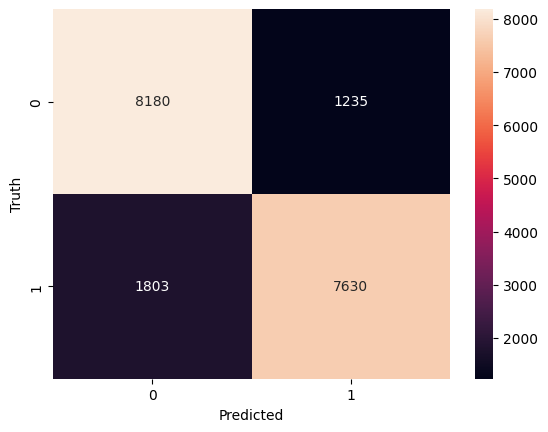

In [81]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
# Generate the classification report
print(classification_report(y_test, y_predictedR))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      9415
           1       0.86      0.81      0.83      9433

    accuracy                           0.84     18848
   macro avg       0.84      0.84      0.84     18848
weighted avg       0.84      0.84      0.84     18848



In [83]:
indices = np.where((y_predictedR == 0) & (y_test == 1))[0]
indices_arr = np.array(indices)

# Get the corresponding elements from X_test
elements = X_test.iloc[indices_arr]

# Print the elements
elements

21596                                  rt mkr spatchcockup
89000    stupid ninja game just friendly head stupid ni...
80033                                  katy clear lake hoe
68877    most crippling surge vandalism crippling vanda...
69947    unacceptable guy i read posted angela kennedy ...
                               ...                        
66899    saturn as i dont want crap written page youre ...
27027              end hopeful message music industry viaa
36823         threats you itiot threat implied still idiot
73963    then grow stop spamming page i hear mommy call...
68771                  fukk im goin encyclopedia dramatica
Name: clean_Text, Length: 1803, dtype: object

In [84]:
elements = pd.DataFrame(elements)

In [85]:
elements

,clean_Text
21596,rt mkr spatchcockup
89000,stupid ninja game just friendly head stupid ni...
80033,katy clear lake hoe
68877,most crippling surge vandalism crippling vanda...
69947,unacceptable guy i read posted angela kennedy ...
...,...
66899,saturn as i dont want crap written page youre ...
27027,end hopeful message music industry viaa
36823,threats you itiot threat implied still idiot
73963,then grow stop spamming page i hear mommy call...


In [90]:
hate_percent = model.predict(["Katy is a hoe"])
print(hate_percent)

1/1 [==============================] - 0s 75ms/step
[[0.914236]]
